In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We have grain data set here. We are trying to cluster different types of grains based on features like area, perimeter ,etc.

In [2]:
df = pd.read_csv('C:/Users/hp/Desktop/Python/dataset/grains.csv')

In [3]:
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [4]:
cl = df.drop(['target'],axis=1)

In [5]:
from sklearn.preprocessing import StandardScaler

Scaling our data set using standard scaler

In [6]:
ss = StandardScaler()
cols = cl.columns
cl = ss.fit_transform(cl)
cl = pd.DataFrame(cl, columns=cols)

In [ ]:
Clustering the dataset using Kmean cluster

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(cl)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
kmeans.cluster_centers_

array([[ 1.482559  ,  1.4659304 ,  0.68260091,  1.44866572,  1.36495106,
        -0.15985907,  1.46678666],
       [-1.04419891, -1.01096544, -1.05792548, -0.88444994, -1.12588932,
         0.81282427, -0.58376519],
       [-0.2873952 , -0.33499741,  0.44573703, -0.44325374, -0.11021387,
        -0.72903069, -0.75769429],
       [ 0.53218584,  0.59309736,  0.20453105,  0.5883764 ,  0.50164948,
         0.1228238 ,  0.61014984]])

In [10]:
kmeans.inertia_    #SSD

371.65314399951615

In [11]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 3, 0, 0,
       3, 3, 3, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1])

In [12]:
ssd = []
sscore = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cl)
    ssd.append([k, kmeans.inertia_])
    ss = silhouette_score(cl, kmeans.labels_)
    sscore.append([k, ss])

In [13]:
ssd_df = pd.DataFrame(ssd, columns=['k','ssd'])

plotting the sum of square distance and findng the elbow point

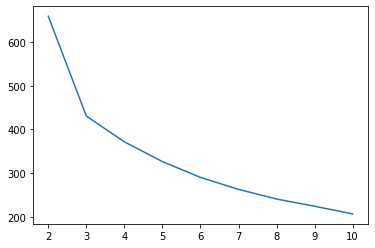

In [14]:
plt.plot(ssd_df['k'], ssd_df['ssd'])
plt.show()

plotting the silhouette score using line graph

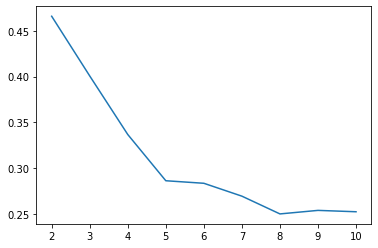

In [15]:

sscore_df = pd.DataFrame(sscore, columns=['k','sscore'])
plt.plot(sscore_df['k'], sscore_df['sscore'])
plt.show()

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(cl)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
tgt = df[['target']]
tgt['cluster'] = kmeans.labels_

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
    pd.crosstab(tgt['target'], tgt['cluster'])

cluster,0,1,2
target,,,
0,6,62,2
1,0,5,65
2,66,4,0


In [19]:
tgt.head()

,target,cluster
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [20]:
import os

In [21]:
os.getcwd()

'C:\\Users\\hp'

 silhoutte plot

In [23]:
import plusmodules as pm

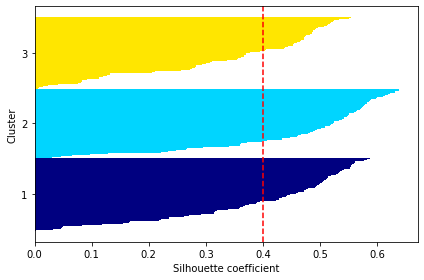

In [24]:
pm.svisualizer(cl, 3)

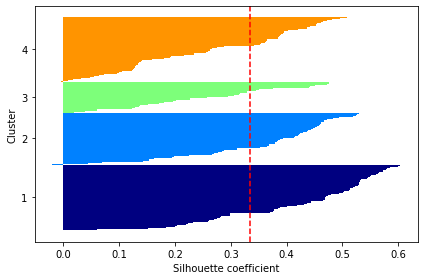

In [25]:
pm.svisualizer(cl, 4)

silhoutte plot is also telling us that cluster with 3 is giving better result

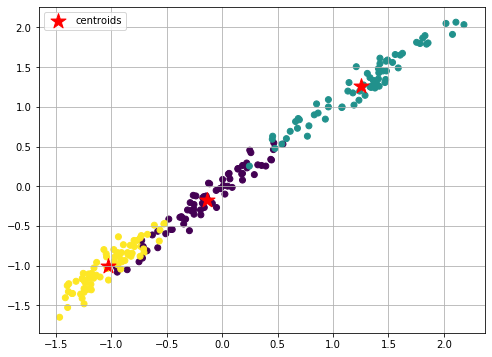

In [27]:
cl = cl.values
pm.cluster_plot(cl, 3)  
# it is taking the first 2 variables and comparing which is also th drawback here as there are 7 and its takng 2